تحميل المكتبات وقراءة البيانات

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# قراءة البيانات من الملف
file_path = 'car_price.csv'
data = pd.read_csv(file_path)

# عرض بعض الصفوف للتأكد من صحة البيانات
print(data.head())

# عرض ملخص البيانات
print(data.info())


   index                                car_name car_prices_in_rupee  \
0      0  Jeep Compass 2.0 Longitude Option BSIV          10.03 Lakh   
1      1            Renault Duster RXZ Turbo CVT          12.83 Lakh   
2      2                      Toyota Camry 2.5 G          16.40 Lakh   
3      3                       Honda Jazz VX CVT           7.77 Lakh   
4      4        Volkswagen Polo 1.2 MPI Highline           5.15 Lakh   

   kms_driven fuel_type transmission  ownership  manufacture   engine    Seats  
0  86,226 kms    Diesel       Manual  1st Owner         2017  1956 cc  5 Seats  
1  13,248 kms    Petrol    Automatic  1st Owner         2021  1330 cc  5 Seats  
2  60,343 kms    Petrol    Automatic  1st Owner         2016  2494 cc  5 Seats  
3  26,696 kms    Petrol    Automatic  1st Owner         2018  1199 cc  5 Seats  
4  69,414 kms    Petrol       Manual  1st Owner         2016  1199 cc  5 Seats  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data co

##### التحقق من القيم المفقودة

In [2]:
# التحقق من وجود قيم مفقودة في البيانات
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# عرض الإحصائيات الوصفية
print('\n',data.describe())
# إذا وجدت أي قيم مفقودة، قرر كيفية التعامل معها (مثل الحذف أو التعبئة).



Missing values in each column:
 index                  0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

              index  manufacture
count  5512.000000  5512.000000
mean   2755.500000  2015.455552
std    1591.321673     3.927974
min       0.000000  1995.000000
25%    1377.750000  2013.000000
50%    2755.500000  2016.000000
75%    4133.250000  2018.000000
max    5511.000000  2022.000000


### تنظيف وتحويل البيانات
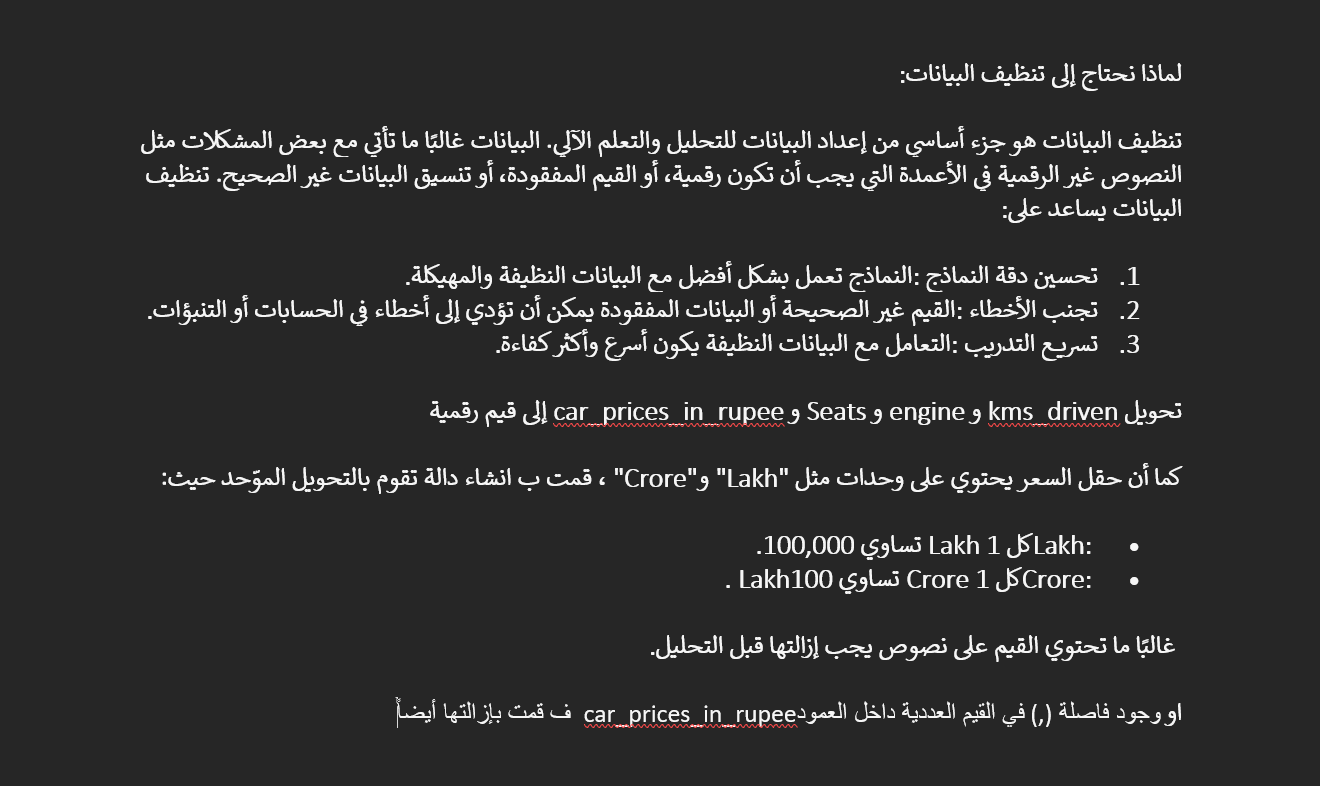

In [3]:
# إزالة النصوص وتحويل القيم إلى أرقام في عمود kms_driven
data['kms_driven'] = data['kms_driven'].str.replace(' kms', '').str.replace(',', '').astype(float)

# إزالة النصوص وتحويل القيم إلى أرقام في عمود engine
data['engine'] = data['engine'].str.replace(' cc', '').astype(float)

# إزالة النصوص وتحويل القيم إلى أرقام في عمود Seats
data['Seats'] = data['Seats'].str.replace(' Seats', '').astype(float)

# التحقق من النتائج بعد التنظيف
print(data[['kms_driven', 'engine', 'Seats']].head())

print('\nThe Price:\n ')

# وظيفة لتحويل القيم
def convert_price(price):
       # إزالة الفواصل
    price = price.replace(',', '')
    if 'Lakh' in price:
        return float(price.replace(' Lakh', ''))
    elif 'Crore' in price:
        return float(price.replace(' Crore', '')) * 100  # لتحويل Crore إلى Lakh
    return price
    
# توحيد الوحدات يضمن أن جميع القيم في نفس المقياس، مما يسهل التحليل والمقارنات.
# استخدام القيم الرقمية النقية يتيح للنماذج الرياضية التعامل مع البيانات بشكل صحيح دون أخطاء.
# القيم الرقمية التي تحتوي على فواصل لا يمكن تحليلها بشكل صحيح كأرقام في معظم المكتبات البرمجية.

# تطبيق التحويل على العمود
data['car_prices_in_rupee'] = data['car_prices_in_rupee'].apply(convert_price)

# التحقق من النتائج بعد التنظيف
print(data['car_prices_in_rupee'].head())



   kms_driven  engine  Seats
0     86226.0  1956.0    5.0
1     13248.0  1330.0    5.0
2     60343.0  2494.0    5.0
3     26696.0  1199.0    5.0
4     69414.0  1199.0    5.0

The Price:
 
0    10.03
1    12.83
2     16.4
3     7.77
4     5.15
Name: car_prices_in_rupee, dtype: object


#####  تحليل البيانات الأولي
##### توزيع البيانات (Histogram)


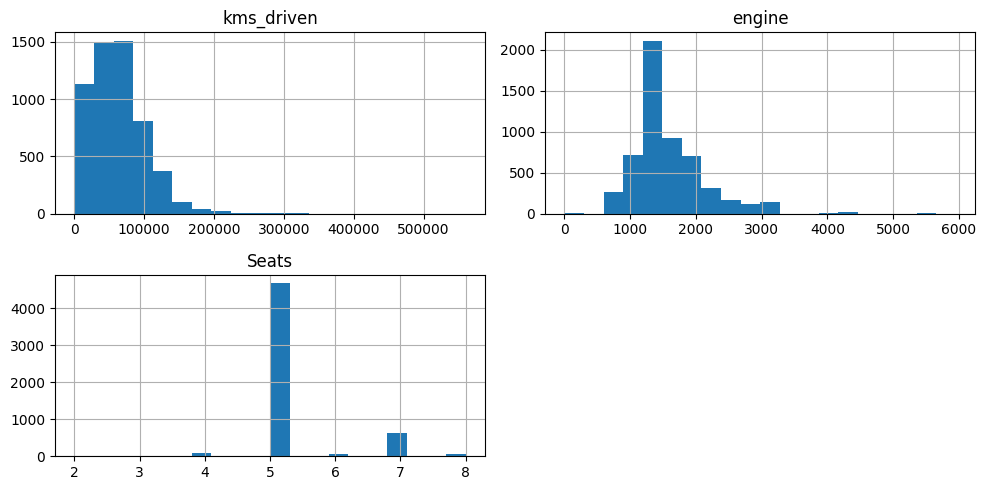

In [4]:
# رسم Histogram للأعمدة الرقمية
data[['kms_driven', 'engine', 'Seats']].hist(bins=20, figsize=(10, 5))
plt.tight_layout()
plt.show()


##### رسم Boxplot


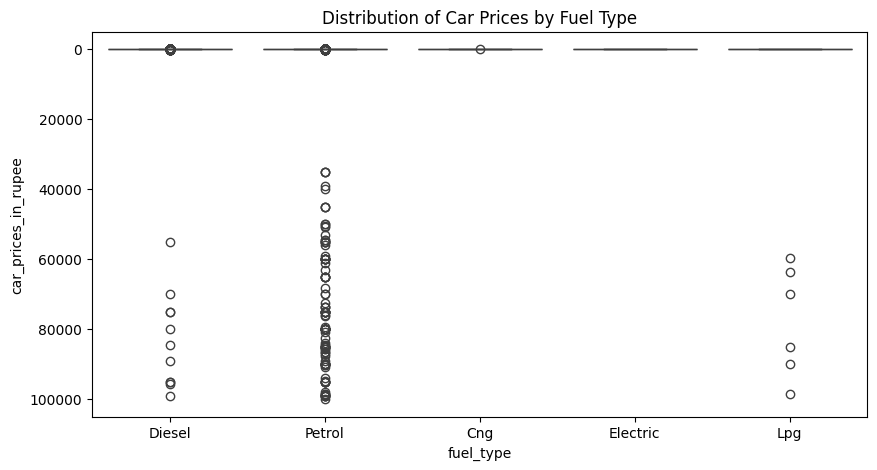

In [5]:
# رسم Boxplot بعد تحويل car_prices_in_rupee إلى أرقام
plt.figure(figsize=(10, 5))
sns.boxplot(x='fuel_type', y='car_prices_in_rupee', data=data)
plt.title('Distribution of Car Prices by Fuel Type')
plt.show()
# نستخدم Boxplot
# 1.لفهم التوزيع: يساعد في التعرف على مدى توزيع البيانات والقيم المركزية.
# 2.لتحديد القيم المتطرفة: يظهر القيم التي تكون خارج النطاق الطبيعي، مما يمكن أن يكون له تأثير على النموذج.


##### تحليل العلاقات باستخدام Pairplot

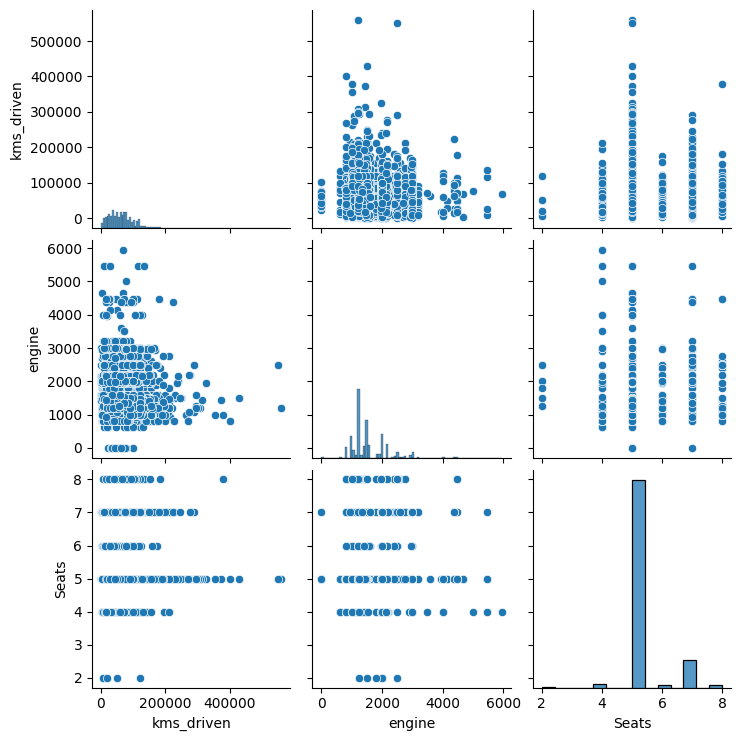

In [6]:
# رسم Pairplot لفهم العلاقات بين الأعمدة المهمة
sns.pairplot(data[['kms_driven', 'engine', 'Seats', 'car_prices_in_rupee']])
plt.show()

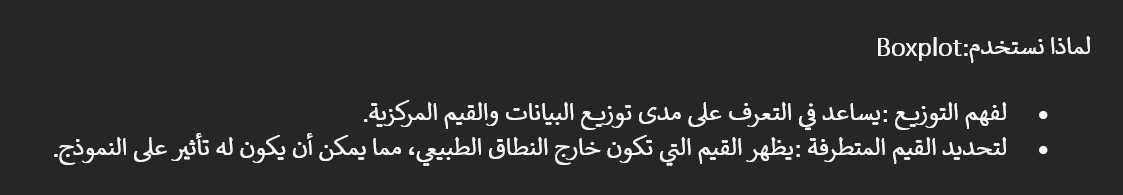
##### بعد تحليل البيانات الأولي نقوم بتحديد أي أعمدة تحتاج إلى معالجة إضافية مثل التشفير أو التطبيع.
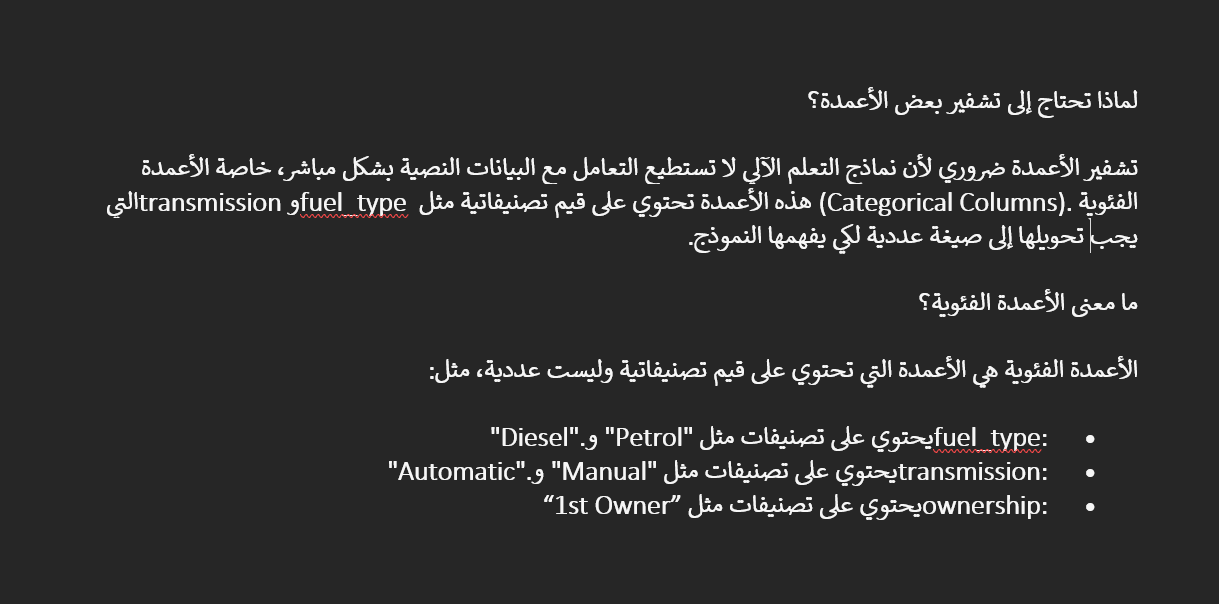

##### حيث سوف نقوم بالتطبيع فيما بعد
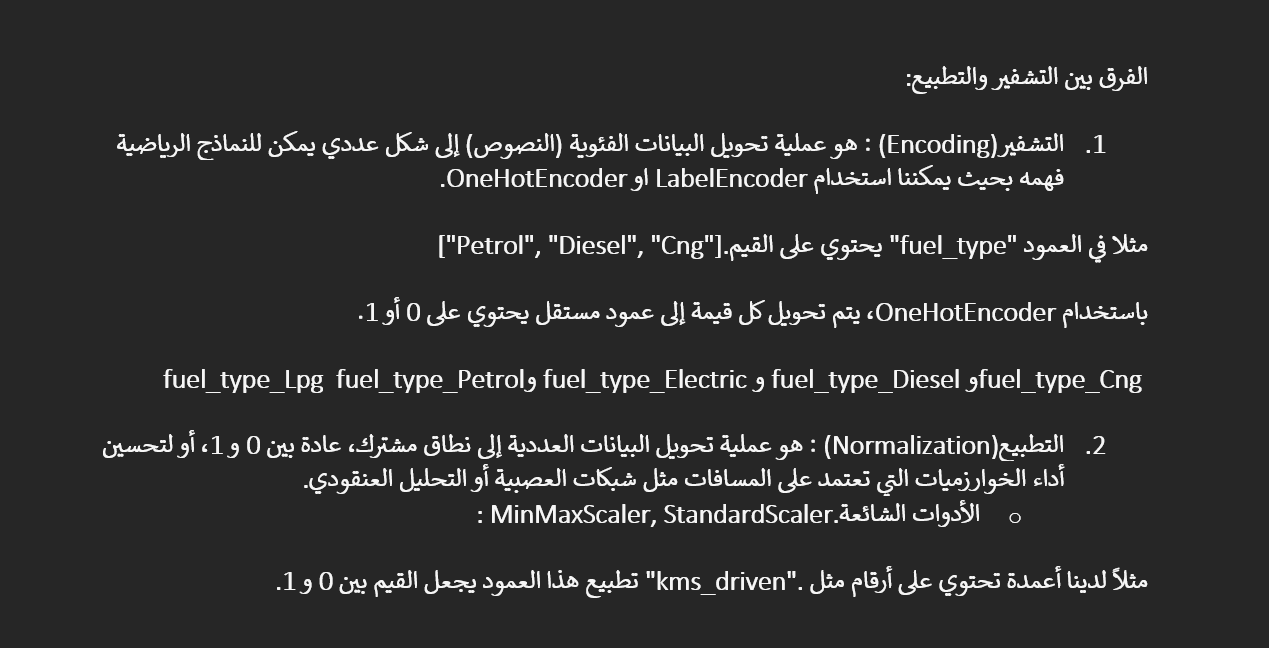

##### لقد وجدت طريقتين ل تشفير البيانات النصية وتحويلها الى رقم وأوجدت الفرق بينهما
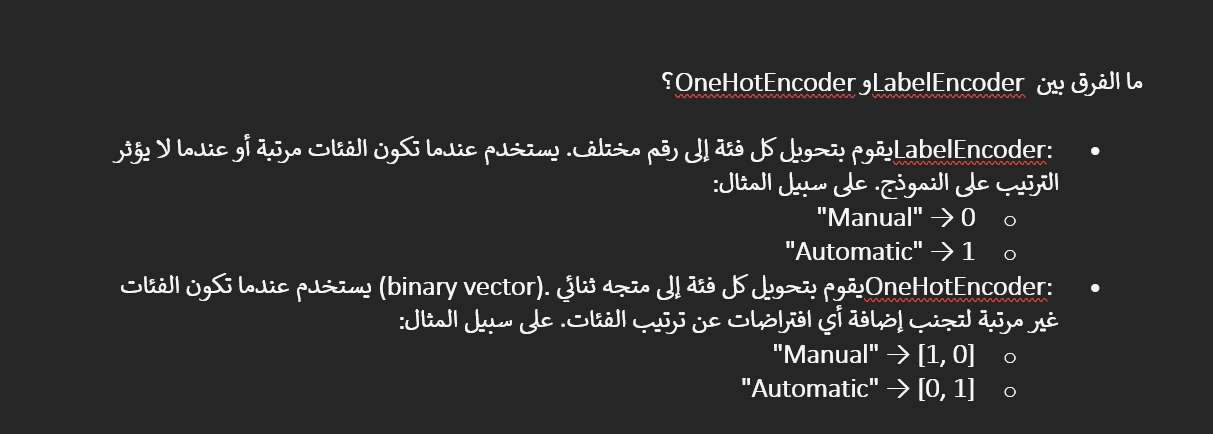

##### اهم خطوة في تنظيف البيانات هي تحديد الfeatures المهمة للتدريب
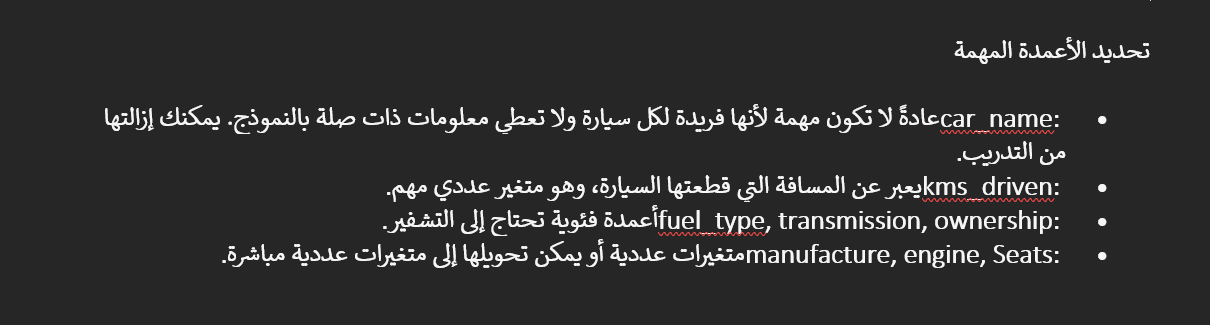

##### تقسيم البيانات إلى Features و Target
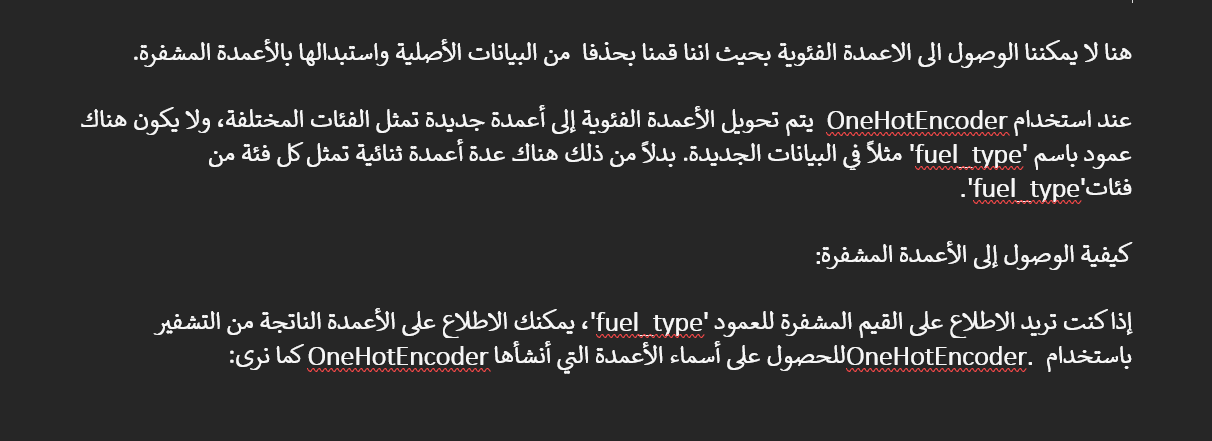


In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# إعداد العرض الكامل للبيانات
pd.set_option('display.max_columns', None)  # عرض جميع الأعمدة
pd.set_option('display.max_rows', None)     # عرض جميع الصفوف
pd.set_option('display.max_colwidth', None) # عرض كامل للعرض النصي في الخلايا
pd.set_option('display.width', 1000)        # عرض البيانات في سطر واحد بشكل أوسع


# إزالة الأعمدة غير المهمة
data = data.drop(['car_name'], axis=1)
data = data.drop(['index'], axis=1)

# تحديد الأعمدة الفئوية لتشفيرها
categorical_cols = ['fuel_type', 'transmission', 'ownership']

# استخدام OneHotEncoder لتشفير الأعمدة الفئوية
#  حيث ان OneHotEncoder
# قام بفصل كل عمود واعاد تسميته الى اعمجة منفصلة ب اسماء مختلفة تعبر عن القيم الموجودة داخله
# بعد التشفير، ستكون هناك أعمدة مثل:
# fuel_type_Diesel
# fuel_type_Petrol

encoder = OneHotEncoder()
encoded_categorical_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]).toarray())

# الحصول على أسماء الأعمدة التي تم إنشاؤها بواسطة OneHotEncoder
encoded_categorical_cols.columns = encoder.get_feature_names_out(categorical_cols)

# دمج الأعمدة المشفرة مع البيانات الأصلية
data = data.join(encoded_categorical_cols)

# إزالة الأعمدة الأصلية الفئوية
data = data.drop(categorical_cols, axis=1)

# تقسيم البيانات إلى Features و Target
X = data.drop('car_prices_in_rupee', axis=1)  # Features
y = data['car_prices_in_rupee']               # Target

print('\nThe Input X is:\n',X.head())

print('\nThe Output Y is:\n',y.head())



The Input X is:
    kms_driven  manufacture  engine  Seats  fuel_type_Cng  fuel_type_Diesel  fuel_type_Electric  fuel_type_Lpg  fuel_type_Petrol  transmission_Automatic  transmission_Manual  ownership_0th Owner  ownership_1st Owner  ownership_2nd Owner  ownership_3rd Owner  ownership_4th Owner  ownership_5th Owner
0     86226.0         2017  1956.0    5.0            0.0               1.0                 0.0            0.0               0.0                     0.0                  1.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
1     13248.0         2021  1330.0    5.0            0.0               0.0                 0.0            0.0               1.0                     1.0                  0.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
2     60343.0         2016  2494.0    5.0            0.0               0.0           

##### رسم Heatmap بعد التشفير
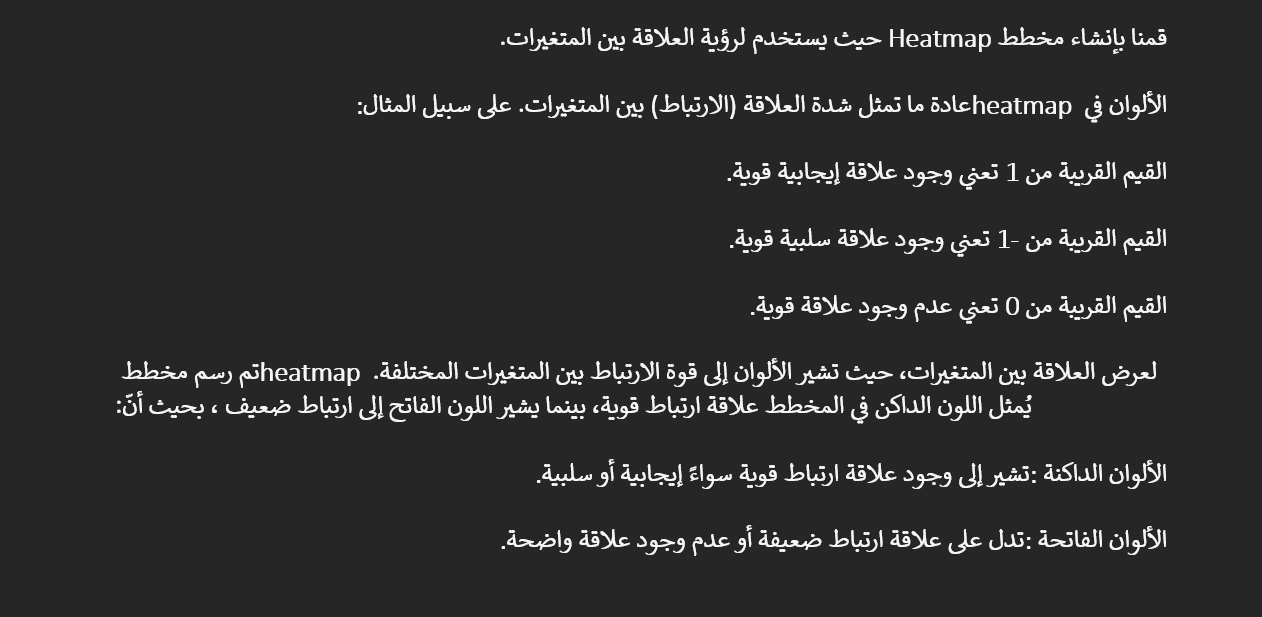

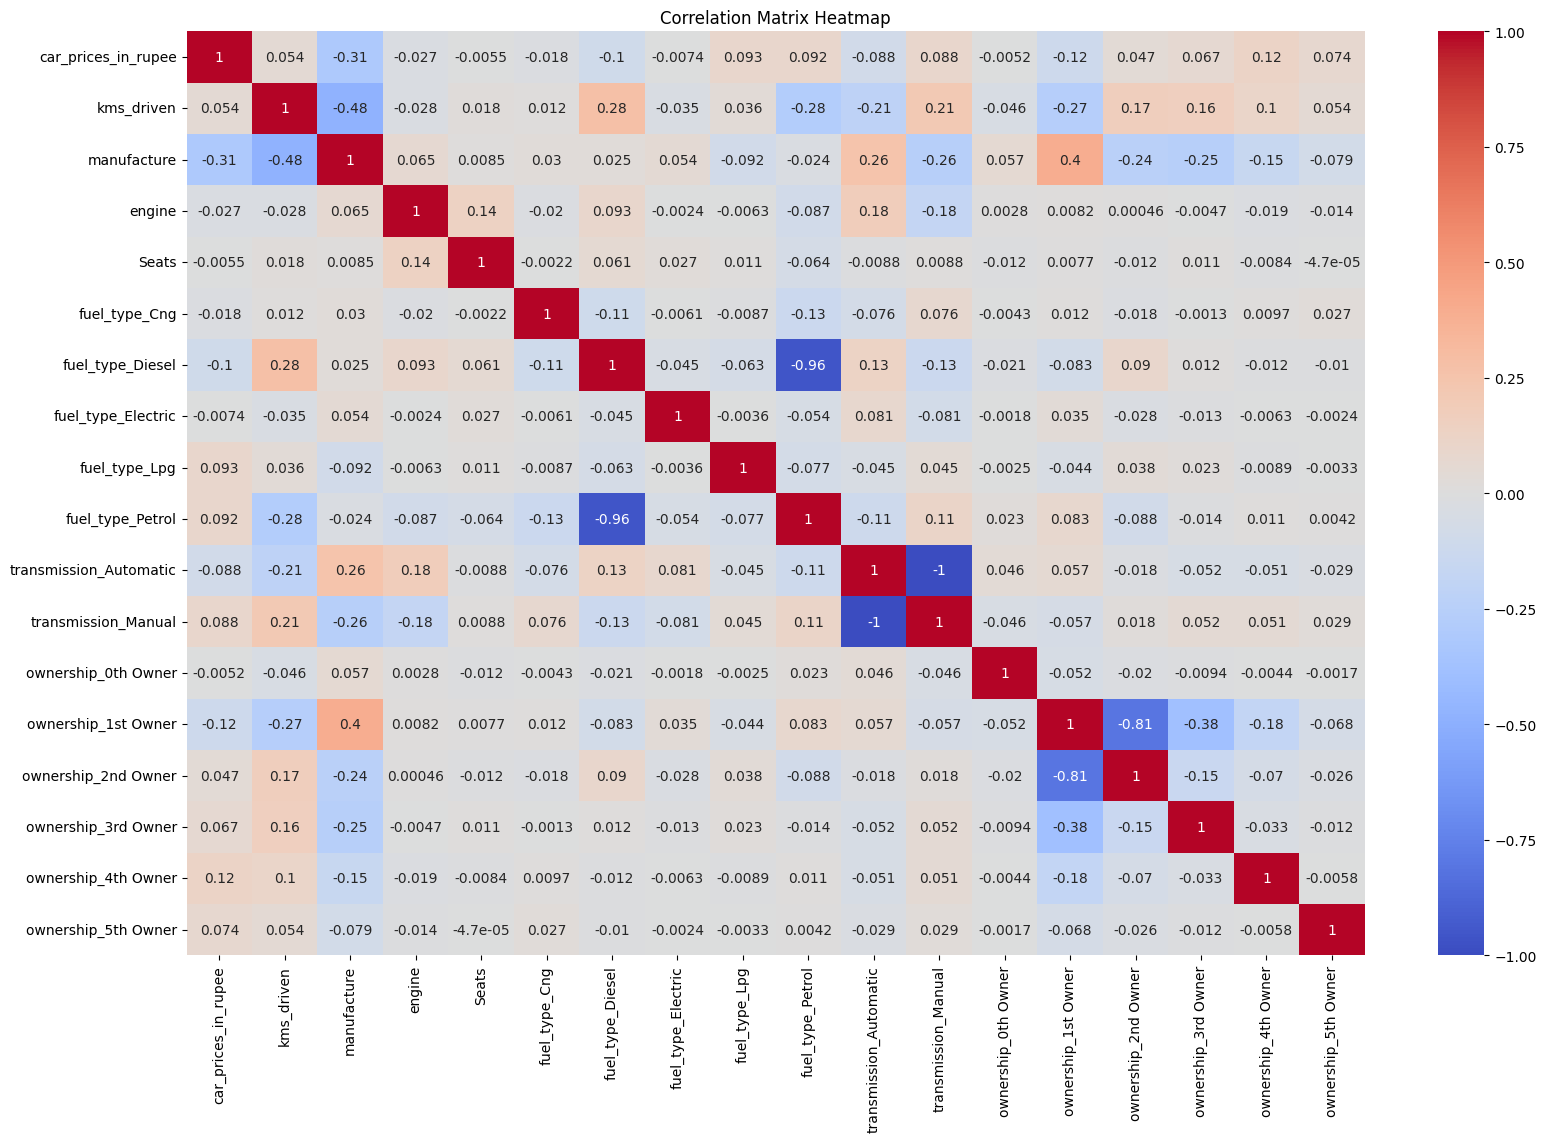

In [8]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # حساب مصفوفة الارتباط
# correlation_matrix = data.corr()

# # رسم heatmap
# plt.figure(figsize=(19, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap')
# plt.show()


رسم Pairplot يظهر التفاعل بين كل عمودين

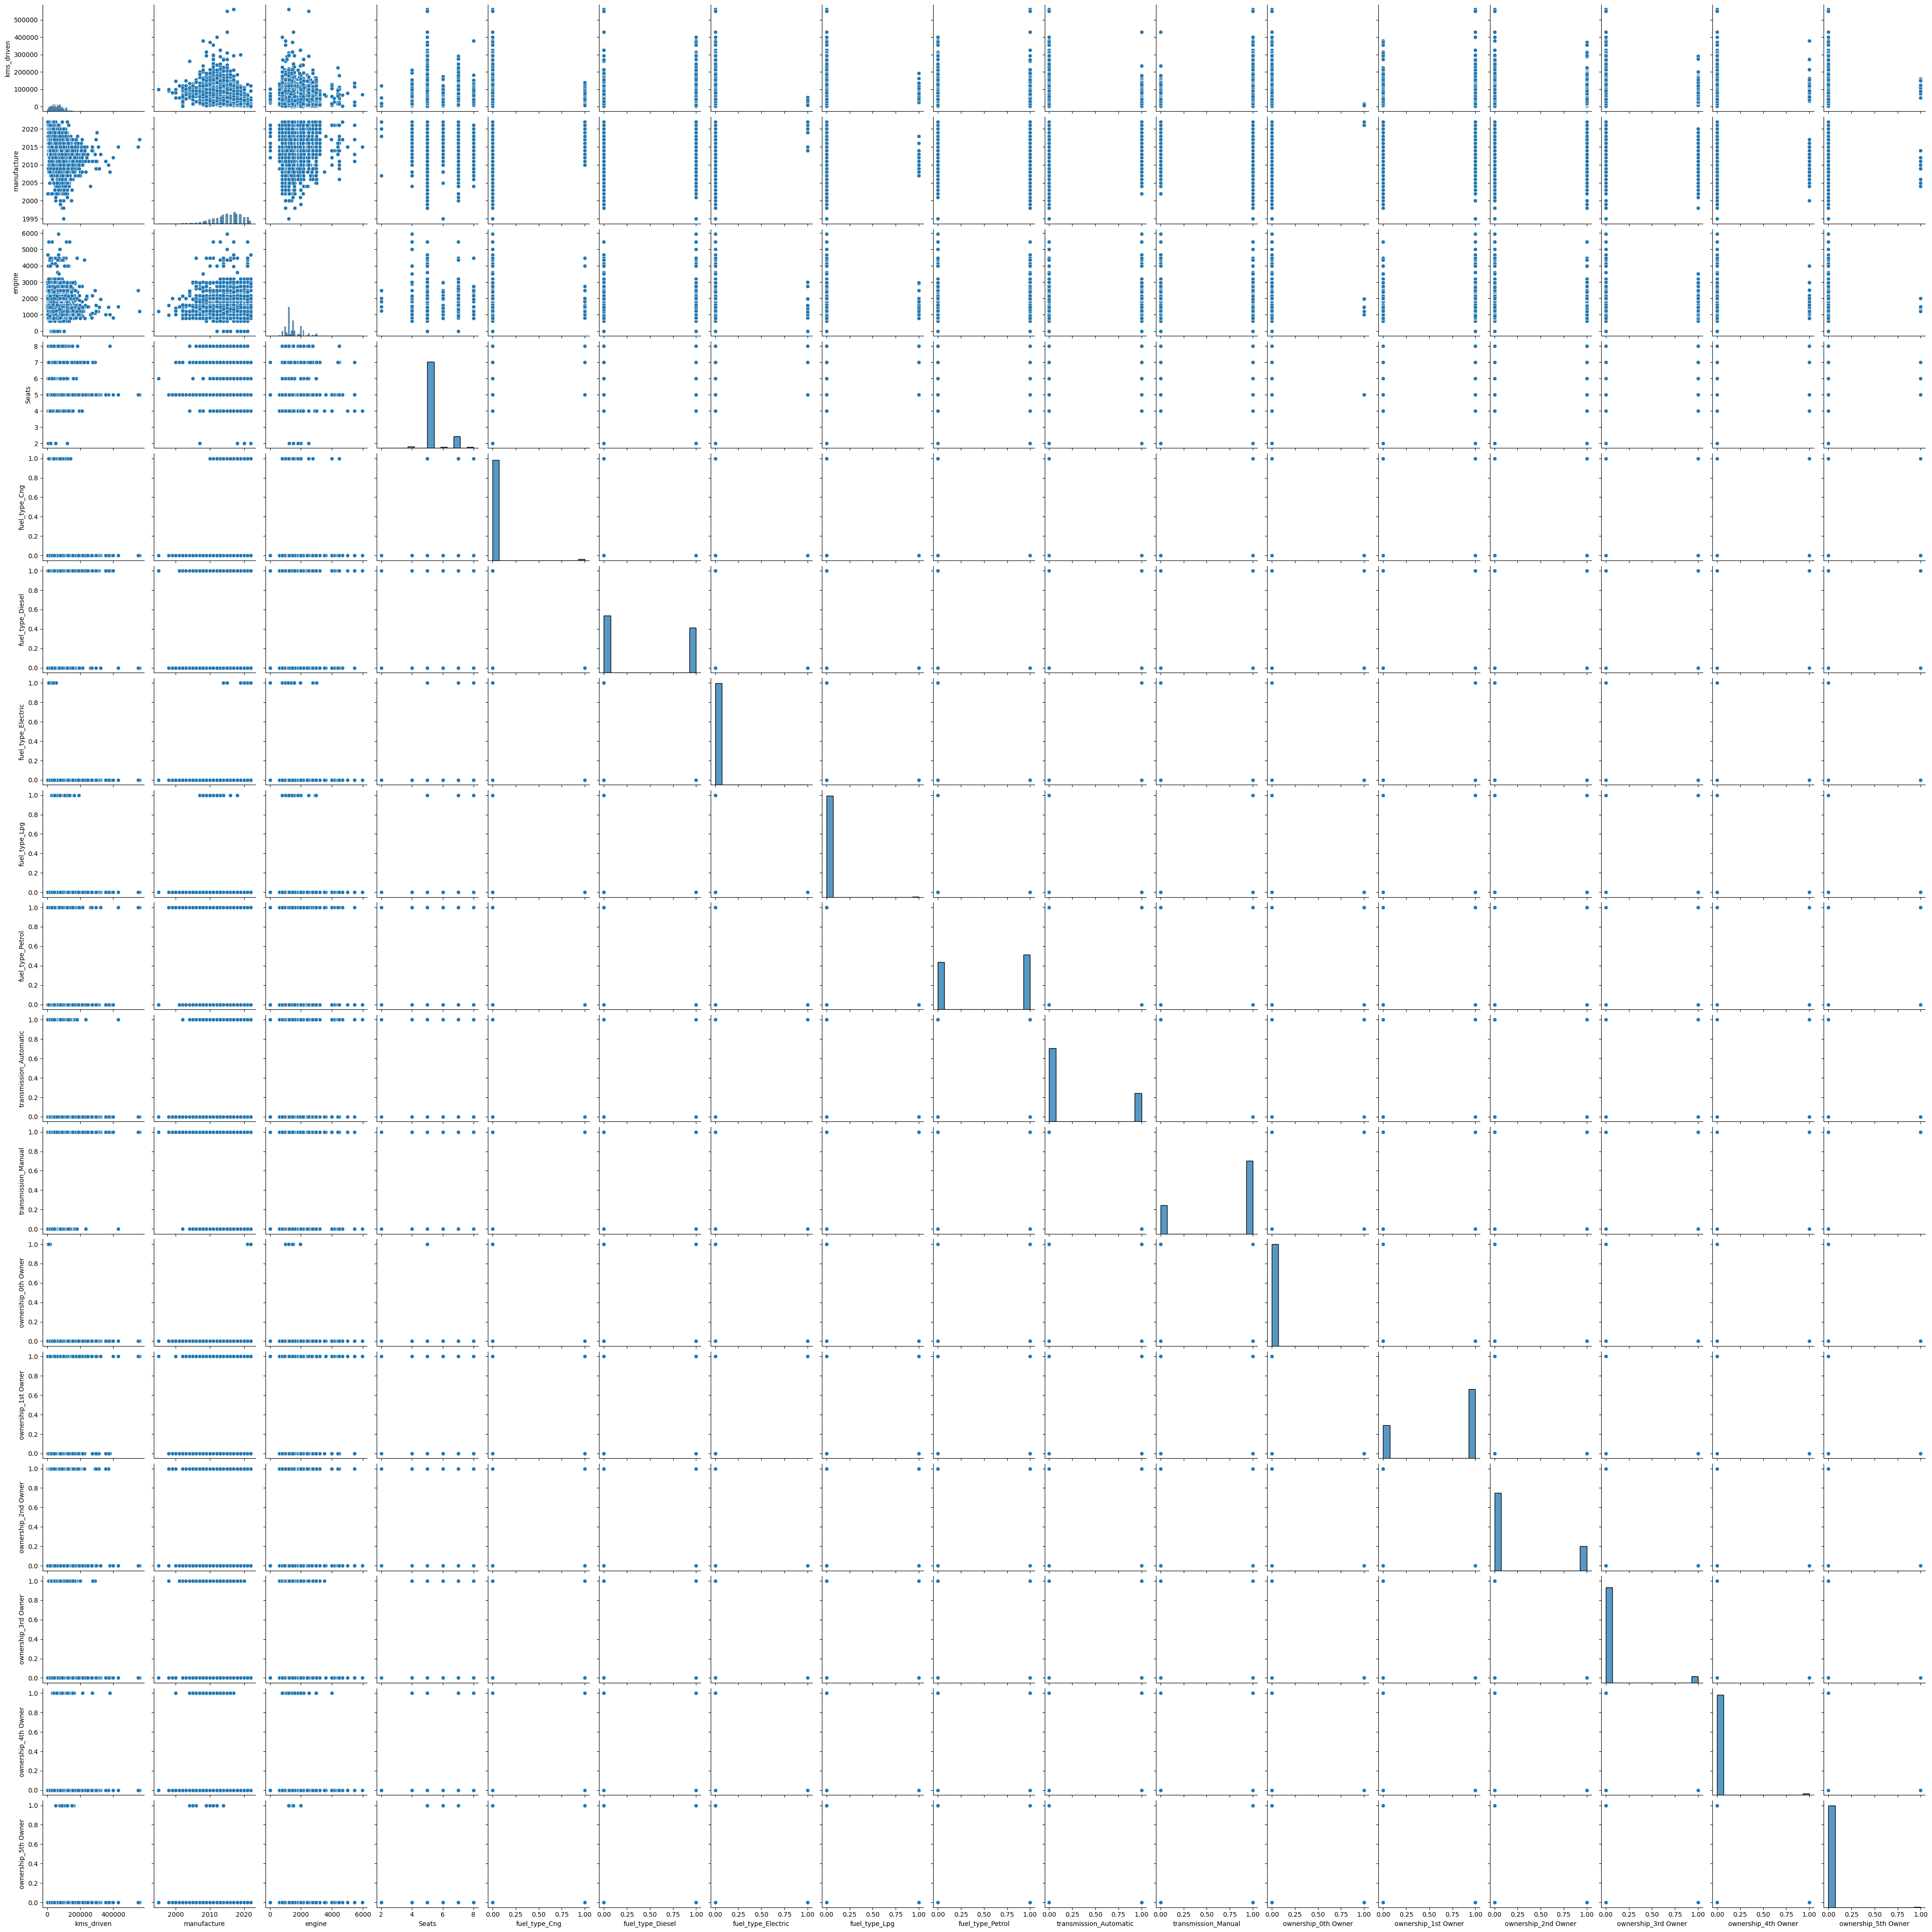

In [9]:
# sns.pairplot(data)
# plt.show()


##### بعد ان قمنا بتظيف البيانات وتشفيرها سوف نقوم بحفظ الداتا المعدلة الى ملف اكسل ليسهل قرائتها 


In [10]:
# import pandas as pd

# # بعد اكتمال معالجة البيانات وتشفيرها
# # نفترض أن البيانات المعالجة موجودة في DataFrame يسمى 'data'

# # حفظ البيانات المعالجة في ملف Excel
# data.to_excel('processed_dataset.xlsx', index=False)

# print("تم حفظ البيانات المعالجة في ملف Excel بنجاح.")


تم حفظ البيانات المعالجة في ملف Excel بنجاح.


In [11]:
# Normalization (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

# تحديد الأعمدة التي نريد تطبيق Normalization عليها
columns_to_normalize = ['car_prices_in_rupee', 'kms_driven', 'manufacture', 'engine', 'Seats']

# إنشاء كائن MinMaxScaler
scaler = MinMaxScaler()

# تطبيق التحجيم
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

print(data.head())


   car_prices_in_rupee  kms_driven  manufacture    engine  Seats  fuel_type_Cng  fuel_type_Diesel  fuel_type_Electric  fuel_type_Lpg  fuel_type_Petrol  transmission_Automatic  transmission_Manual  ownership_0th Owner  ownership_1st Owner  ownership_2nd Owner  ownership_3rd Owner  ownership_4th Owner  ownership_5th Owner
0             0.000090    0.153597     0.814815  0.328739    0.5            0.0               1.0                 0.0            0.0               0.0                     0.0                  1.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
1             0.000118    0.023221     0.962963  0.223529    0.5            0.0               0.0                 0.0            0.0               1.0                     1.0                  0.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
2             0.000154    0.107357

In [12]:
# import pandas as pd

# data.to_excel('processed_dataset_by_Normalization.xlsx', index=False)

# print("تم حفظ البيانات المعالجة في ملف Excel بنجاح.")

تم حفظ البيانات المعالجة في ملف Excel بنجاح.


In [13]:
# Standardization (Z-Score Scaling)
from sklearn.preprocessing import StandardScaler

# تحديد الأعمدة التي نريد تطبيق Standardization عليها
columns_to_standardize = ['car_prices_in_rupee', 'kms_driven', 'manufacture', 'engine', 'Seats']

# إنشاء كائن StandardScaler
scaler = StandardScaler()

# تطبيق التحجيم
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

print(data.head())


   car_prices_in_rupee  kms_driven  manufacture    engine     Seats  fuel_type_Cng  fuel_type_Diesel  fuel_type_Electric  fuel_type_Lpg  fuel_type_Petrol  transmission_Automatic  transmission_Manual  ownership_0th Owner  ownership_1st Owner  ownership_2nd Owner  ownership_3rd Owner  ownership_4th Owner  ownership_5th Owner
0            -0.147554    0.550046     0.393228  0.731579 -0.348225            0.0               1.0                 0.0            0.0               0.0                     0.0                  1.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
1            -0.147310   -1.194156     1.411657 -0.349299 -0.348225            0.0               0.0                 0.0            0.0               1.0                     1.0                  0.0                  0.0                  1.0                  0.0                  0.0                  0.0                  0.0
2            -0.146999   

In [14]:
# import pandas as pd

# data.to_excel('processed_dataset_by_Standardization.xlsx', index=False)

# print("تم حفظ البيانات المعالجة في ملف Excel بنجاح.")

تم حفظ البيانات المعالجة في ملف Excel بنجاح.



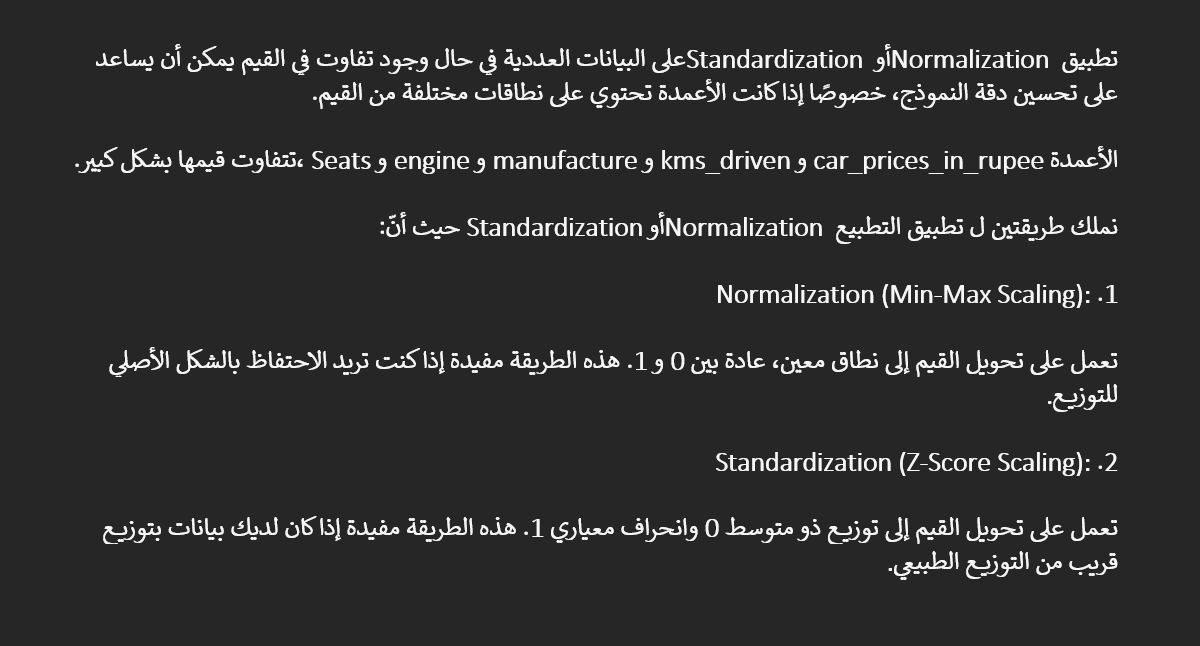
##### Seats: بالرغم من أن القيم عادة ما تكون محدودة (مثل 2، 4، 5، 7)، إلا أنه قد يكون من الأفضل تطبيق التحجيم عليها إذا كان لديك فروقات كبيرة في التوزيع.


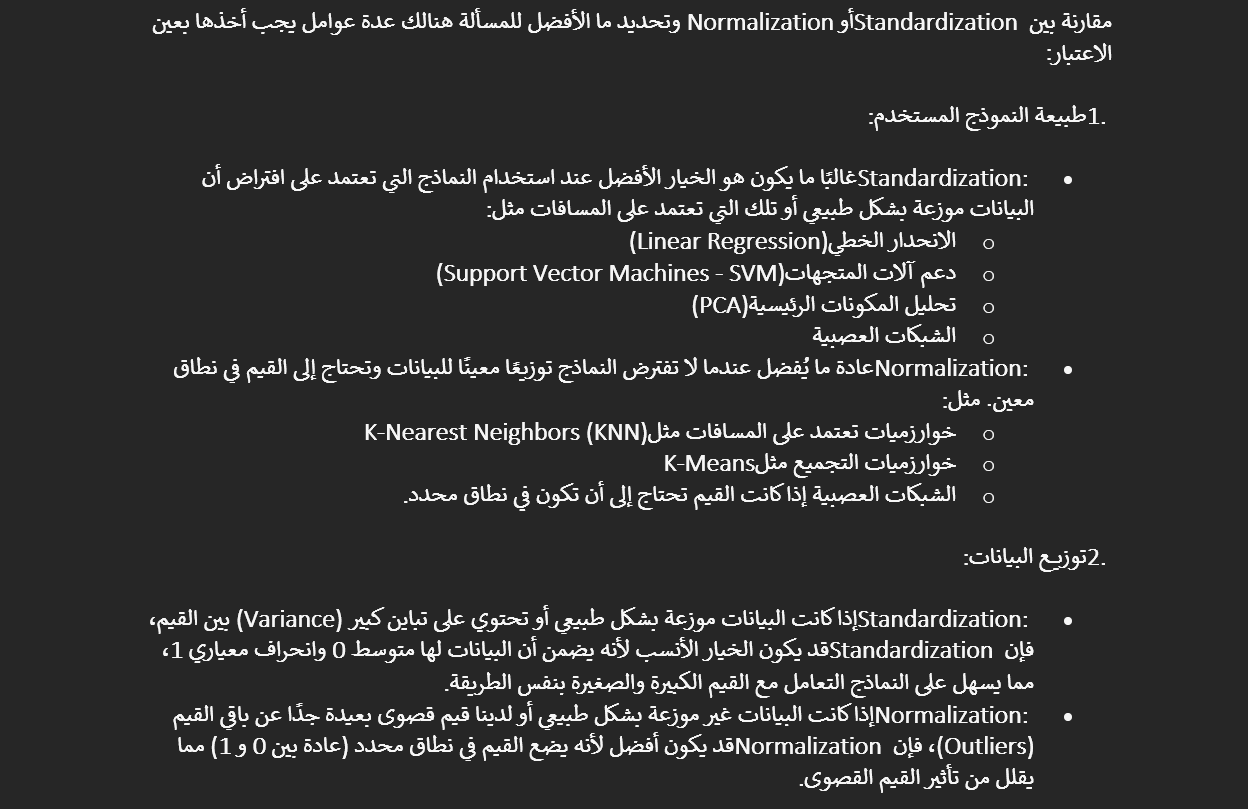
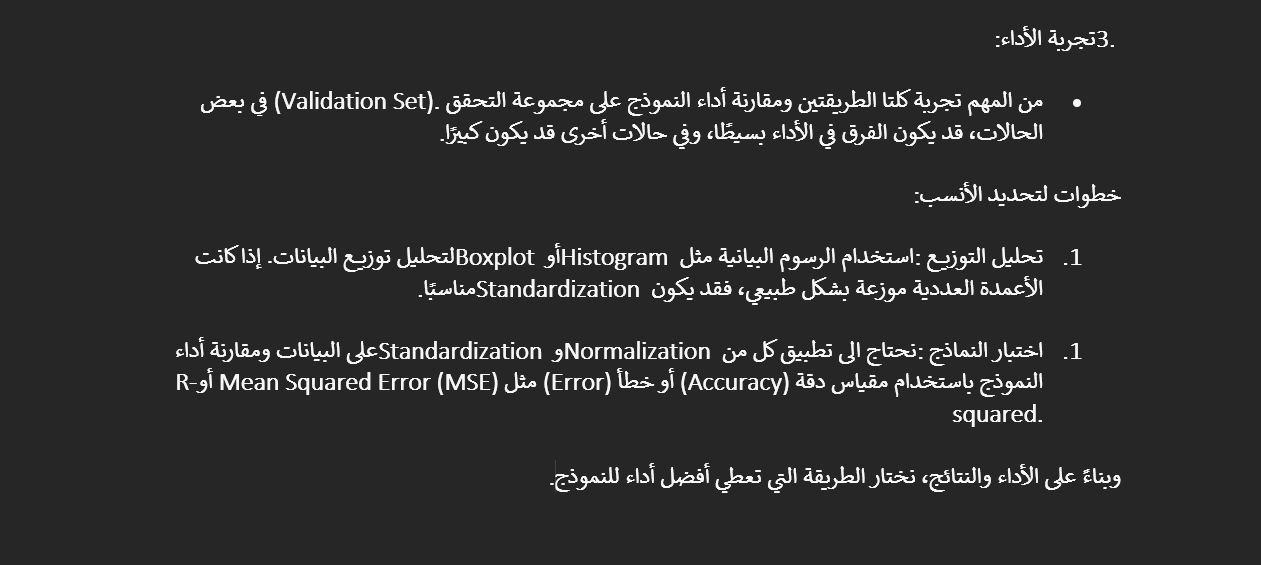

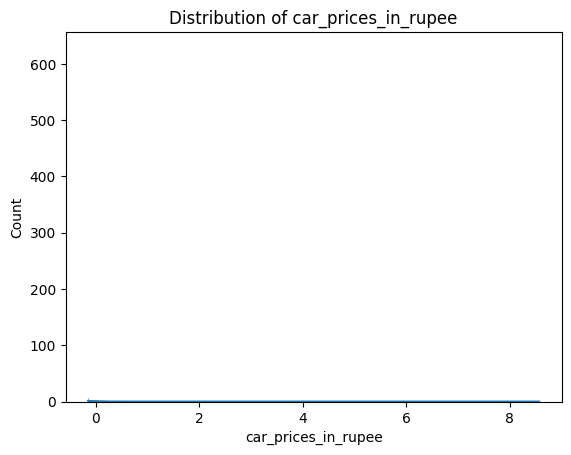

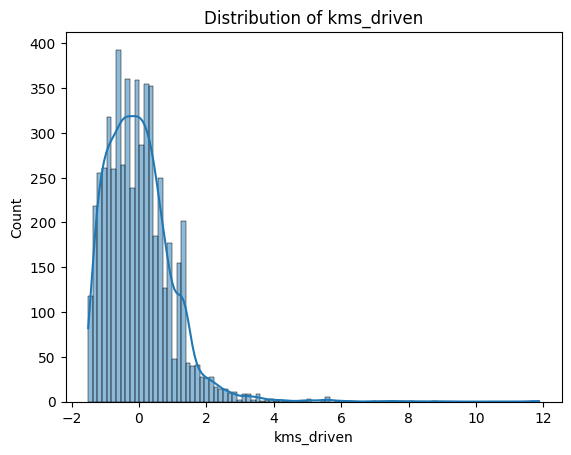

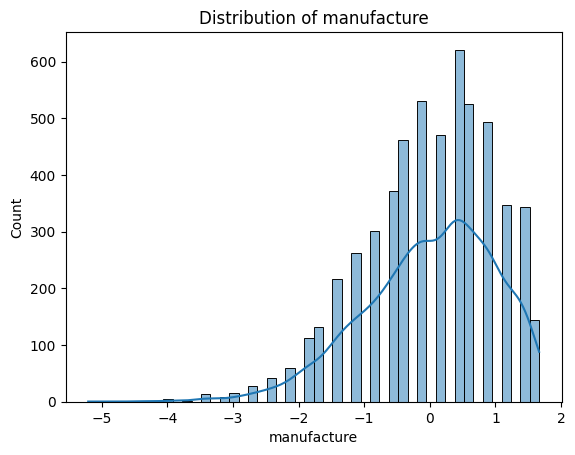

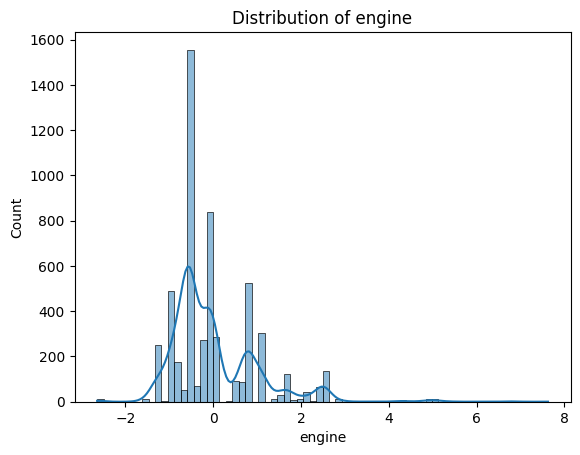

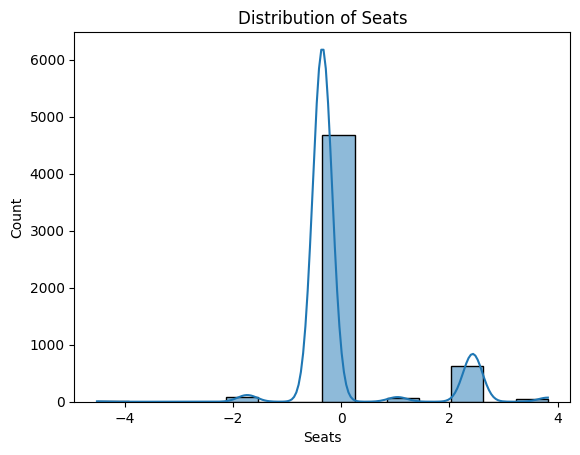

In [15]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # رسم Histogram
# for column in ['car_prices_in_rupee', 'kms_driven', 'manufacture', 'engine', 'Seats']:
#     plt.figure()
#     sns.histplot(data[column], kde=True)
#     plt.title(f'Distribution of {column}')
# plt.show()


##### أسعار السيارات. هذه القيم يمكن أن تتراوح بين قيم صغيرة وكبيرة، وقد تحتوي على قيم متطرفة.
##### المسافة المقطوعة بالسيارة. هذه القيم يمكن أن تتراوح بين قيم صغيرة وكبيرة، وقد تحتوي على قيم متطرفة.
##### سنة التصنيع. هذه القيم محدودة النطاق (عادة بين 1900 و2023)، وقد تكون موزعة بشكل متساو.
##### .حجم المحرك. هذه القيم يمكن أن تتراوح بين قيم صغيرة وكبيرة، وقد تحتوي على قيم متطرفة.
##### .عدد المقاعد. هذه القيم محدودة النطاق (عادة بين 2 و9)، وقد تكون موزعة بشكل متساو.
##### وبقية الاعمدة تم تشفيرها بالفعل



##### بعدما تم تنظيف البيانات وتحضيرها بحيث تم :
##### تحويل القيم النصية إلى قيم عددية (تم تنظيفها بالفعل).
##### تشفير الأعمدة الفئوية.
##### تطبيع الاعمدة العددية.
##### ب استخدام Normalization وStandardization
##### تقسيم البيانات إلى Features و.Target
#### الآن سوف ننتقل الى الخطوة التالية والتي هي تجهيز البيانات ل تدريب الموديل وتقسيمها

##### تقسيم البيانات إلى مجموعة تدريب واختبار

In [16]:
# سنستخدم train_test_split من مكتبة sklearn لتقسيم البيانات
from sklearn.model_selection import train_test_split

# افتراض أن البيانات والهدف هما data و target
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

##### بناء نموذج MLP باستخدام Keras


In [17]:
# سنقوم ببناء نموذج بسيط مع عدد من الطبقات الكثيفة واستخدام دالة التنشيط ReLU للطبقات المخفية ودالة linear للطبقة الأخيرة للتنبؤ
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# إنشاء النموذج
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # الطبقة الأولى
    Dense(32, activation='relu'),  # الطبقة الثانية
    Dense(1, activation='linear')  # الطبقة الأخيرة (للتنبؤ بالقيمة)
])

# تجميع النموذج
model.compile(optimizer='adam', loss='mse', metrics=['mae'])




c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
import numpy as np

print(f"X_train type: {type(X_train)}, dtypes: \n{X_train.dtypes}")
print(f"X_test type: {type(X_test)}, dtypes: \n{X_test.dtypes}")
print(f"y_train type: {type(y_train)}, dtype: {y_train.dtype if isinstance(y_train, np.ndarray) else 'N/A'}")
print(f"y_test type: {type(y_test)}, dtype: {y_test.dtype if isinstance(y_test, np.ndarray) else 'N/A'}")

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

X_train type: <class 'pandas.core.frame.DataFrame'>, dtypes: 
car_prices_in_rupee       float64
kms_driven                float64
manufacture               float64
engine                    float64
Seats                     float64
fuel_type_Cng             float64
fuel_type_Diesel          float64
fuel_type_Electric        float64
fuel_type_Lpg             float64
fuel_type_Petrol          float64
transmission_Automatic    float64
transmission_Manual       float64
ownership_0th Owner       float64
ownership_1st Owner       float64
ownership_2nd Owner       float64
ownership_3rd Owner       float64
ownership_4th Owner       float64
ownership_5th Owner       float64
dtype: object
X_test type: <class 'pandas.core.frame.DataFrame'>, dtypes: 
car_prices_in_rupee       float64
kms_driven                float64
manufacture               float64
engine                    float64
Seats                     float64
fuel_type_Cng             float64
fuel_type_Diesel          float64
fuel_type_Ele

In [19]:
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())
y_train = np.array(y_train)
y_test = np.array(y_test)

Missing values in X_train: car_prices_in_rupee       0
kms_driven                0
manufacture               0
engine                    0
Seats                     0
fuel_type_Cng             0
fuel_type_Diesel          0
fuel_type_Electric        0
fuel_type_Lpg             0
fuel_type_Petrol          0
transmission_Automatic    0
transmission_Manual       0
ownership_0th Owner       0
ownership_1st Owner       0
ownership_2nd Owner       0
ownership_3rd Owner       0
ownership_4th Owner       0
ownership_5th Owner       0
dtype: int64
Missing values in y_train: 0


##### تدريب النموذج


In [21]:
# تدريب النموذج
# تحويل البيانات إلى النوع الصحيح
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# تدريب النموذج
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 161619456.0000 - mae: 2027.0023 - val_loss: 105584336.0000 - val_mae: 1306.2111
Epoch 2/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 147258000.0000 - mae: 1891.0316 - val_loss: 104488872.0000 - val_mae: 1375.7538
Epoch 3/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 170085344.0000 - mae: 2269.8457 - val_loss: 101720768.0000 - val_mae: 1562.6995
Epoch 4/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120516680.0000 - mae: 1921.8102 - val_loss: 96675424.0000 - val_mae: 1812.1017
Epoch 5/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104367872.0000 - mae: 2041.2456 - val_loss: 89112888.0000 - val_mae: 2052.5500
Epoch 6/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125669264.0000 - mae: 2641.4272 - val_loss: 80009768.0000 - val_mae: 2185.1287
Epoch 7/100
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89520360.0000 - mae: 2463.0835 - val_loss: 70380104.0000 - val_mae: 2223.9055
Epoch 8/100
138/13

##### تقييم النموذج واستعراض منحنيات التعلم


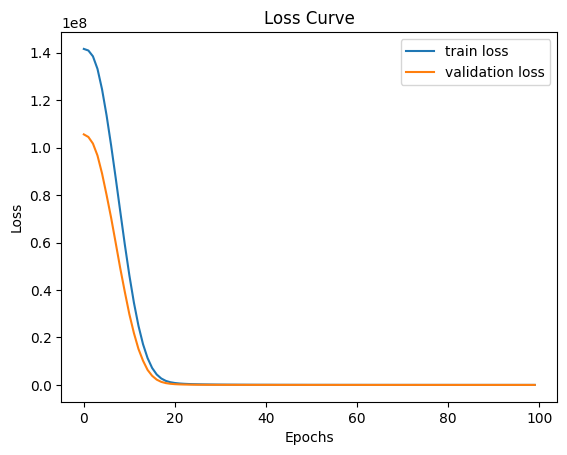

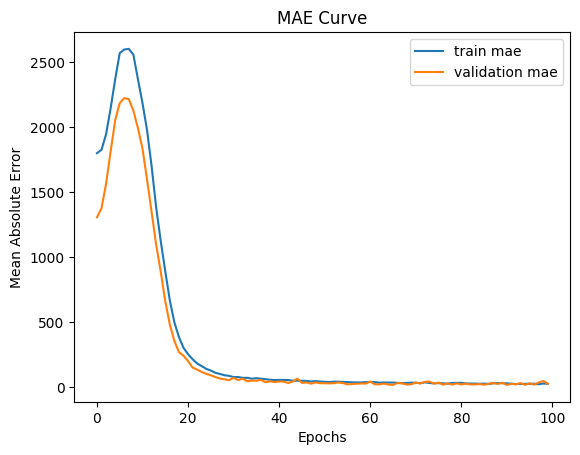

In [22]:
# سنقوم بتحليل الأداء باستخدام منحنيات التعلم (الخسارة والدقة)
import matplotlib.pyplot as plt

# استعراض منحنيات الخسارة
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# استعراض منحنيات الدقة (إذا كنت تستخدمها)
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='validation mae')
plt.legend()
plt.title('MAE Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
